### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Get json data  

In [2]:
import requests
import json
r=requests.get('https://api.covid19india.org/raw_data1.json')
d=json.loads(r.text)
df1=pd.DataFrame(d['raw_data'])

r=requests.get('https://api.covid19india.org/raw_data2.json')
d=json.loads(r.text)
df2=pd.DataFrame(d['raw_data'])

r=requests.get('https://api.covid19india.org/raw_data3.json')
d=json.loads(r.text)
df3=pd.DataFrame(d['raw_data'])

del df1['backupnotes']
del df2['backupnotes']

df=df1.append(df3)
df=df.append(df2)

r=requests.get('https://api.covid19india.org/raw_data4.json')
d=json.loads(r.text)
df4=pd.DataFrame(d['raw_data'])

df=df.append(df4)

df

c:\users\nitj\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,agebracket,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,entryid,estimatedonsetdate,gender,...,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
0,20,,Recovered,30/01/2020,Thrissur,Thrissur,Kerala,NaN,,F,...,Travelled from Wuhan,1,1,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-TS-P1,14/02/2020,Imported
1,,,Recovered,02/02/2020,Alappuzha,Alappuzha,Kerala,NaN,,,...,Travelled from Wuhan,1,2,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-AL-P1,14/02/2020,Imported
2,,,Recovered,03/02/2020,Kasaragod,Kasaragod,Kerala,NaN,,,...,Travelled from Wuhan,1,3,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL,KL-KS-P1,14/02/2020,Imported
3,45,,Recovered,02/03/2020,East Delhi (Mayur Vihar),East Delhi,Delhi,NaN,,M,...,"Travelled from Austria, Italy",1,4,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,,DL,DL-P1,15/03/2020,Imported
4,24,,Recovered,02/03/2020,Hyderabad,Hyderabad,Telangana,NaN,,M,...,"Travelled from Dubai to Bangalore on 20th Feb,...",1,5,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,TG,TS-P1,02/03/2020,Imported
5,69,,Recovered,03/03/2020,Jaipur,Italians,Rajasthan,NaN,,M,...,Travelled from Italy,1,6,https://indianexpress.com/article/india/corona...,https://economictimes.indiatimes.com/news/poli...,https://twitter.com/PTI_News/status/1240878975...,RJ,,03/03/2020,Imported
6,55,P6,Recovered,04/03/2020,Gurugram,Italians,Haryana,NaN,,,...,Travelled from Italy,1,7,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,,HR,,29/03/2020,Imported
7,55,P6,Recovered,04/03/2020,Gurugram,Italians,Haryana,NaN,,,...,Travelled from Italy,1,8,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,,HR,,29/03/2020,Imported
8,55,P6,Recovered,04/03/2020,Gurugram,Italians,Haryana,NaN,,,...,Travelled from Italy,1,9,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,,HR,,29/03/2020,Imported
9,55,P6,Recovered,04/03/2020,Gurugram,Italians,Haryana,NaN,,,...,Travelled from Italy,1,10,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,,HR,,29/03/2020,Imported


### Changing data type of numcases to numeric

In [3]:
df['numcases'] = df['numcases'].apply(lambda x: '1' if x =='' else x)
df['numcases']=pd.to_numeric(df['numcases'])

### Dropping unnecessary columns

In [4]:
df=df.drop(['source1','source2','source3','patientnumber','notes','estimatedonsetdate','entryid'],axis=1)

### Making seperate columns for day, month and year

In [5]:
g=df.dateannounced.str.split('/',expand=True).iloc[:,0:3]
g.columns=['day','month','year']
df=pd.concat([df,g],axis=1)
df

,agebracket,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,gender,nationality,numcases,statecode,statepatientnumber,statuschangedate,typeoftransmission,day,month,year
0,20,,Recovered,30/01/2020,Thrissur,Thrissur,Kerala,F,India,1,KL,KL-TS-P1,14/02/2020,Imported,30,01,2020
1,,,Recovered,02/02/2020,Alappuzha,Alappuzha,Kerala,,India,1,KL,KL-AL-P1,14/02/2020,Imported,02,02,2020
2,,,Recovered,03/02/2020,Kasaragod,Kasaragod,Kerala,,India,1,KL,KL-KS-P1,14/02/2020,Imported,03,02,2020
3,45,,Recovered,02/03/2020,East Delhi (Mayur Vihar),East Delhi,Delhi,M,India,1,DL,DL-P1,15/03/2020,Imported,02,03,2020
4,24,,Recovered,02/03/2020,Hyderabad,Hyderabad,Telangana,M,India,1,TG,TS-P1,02/03/2020,Imported,02,03,2020
5,69,,Recovered,03/03/2020,Jaipur,Italians,Rajasthan,M,Italy,1,RJ,,03/03/2020,Imported,03,03,2020
6,55,P6,Recovered,04/03/2020,Gurugram,Italians,Haryana,,Italy,1,HR,,29/03/2020,Imported,04,03,2020
7,55,P6,Recovered,04/03/2020,Gurugram,Italians,Haryana,,Italy,1,HR,,29/03/2020,Imported,04,03,2020
8,55,P6,Recovered,04/03/2020,Gurugram,Italians,Haryana,,Italy,1,HR,,29/03/2020,Imported,04,03,2020
9,55,P6,Recovered,04/03/2020,Gurugram,Italians,Haryana,,Italy,1,HR,,29/03/2020,Imported,04,03,2020


### Total no. of Covid-19 cases in India till now :

In [6]:
d=df[df['currentstatus']=="Hospitalized"]
d.numcases.sum()

131210

### Top 10 states in terms of no. of cases till now

In [10]:
s=d.groupby('detectedstate').numcases.sum().sort_values(ascending=False).head(10)
s

detectedstate
Maharashtra       47178
Tamil Nadu        15505
Gujarat           13664
Delhi             12906
Rajasthan          6738
Madhya Pradesh     6369
Uttar Pradesh      6008
West Bengal        3453
Andhra Pradesh     2712
Bihar              2402
Name: numcases, dtype: int64

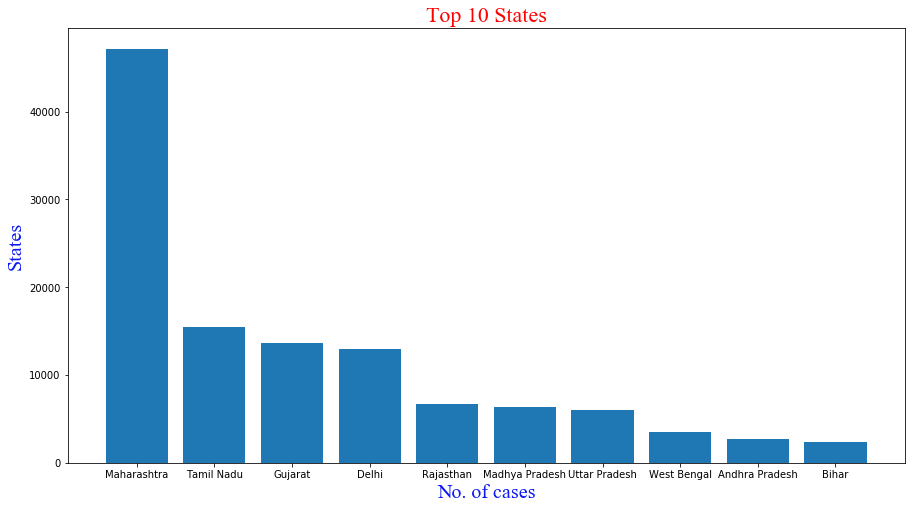

In [11]:
plt.rc('figure',figsize=(15,8))
plt.title('Top 10 States',fontsize=22,fontname='Times New Roman',color='r',weight='bold')
plt.xlabel('No. of cases',fontsize=20,fontname='Times New Roman',color='#0d1af3',weight='bold')
plt.ylabel('States',fontsize=20,fontname='Times New Roman',color='#0d1af3',weight='bold')

plt.bar(s.index,list(s))
plt.show()

### Increase in no. of cases per day for the month of April

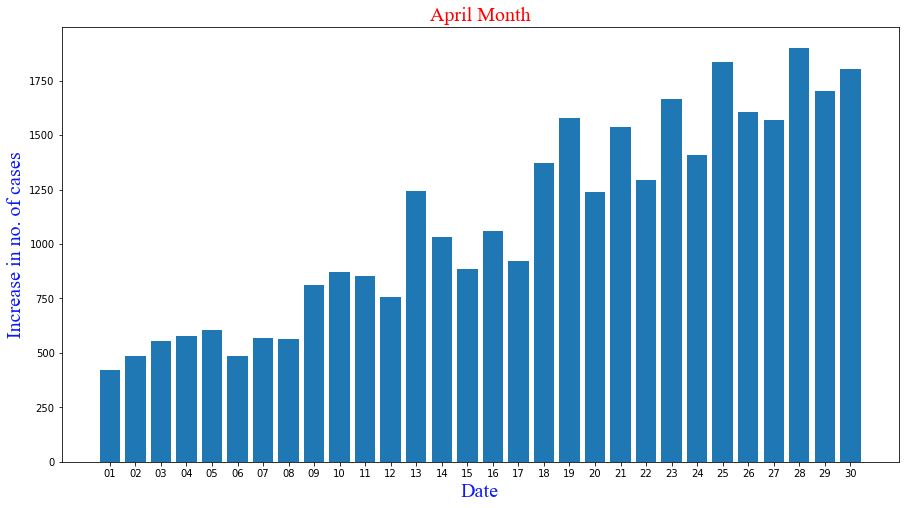

In [12]:
plt.title('April Month',fontsize=20,fontname='Times New Roman',color='r',weight='bold')
plt.xlabel('Date',fontsize=20,fontname='Times New Roman',color='#0d1af3',weight='bold')
plt.ylabel('Increase in no. of cases',fontsize=20,fontname='Times New Roman',color='#0d1af3',weight='bold')

d1=d[(d['month']=="04")]
s=d1.groupby('day').numcases.sum()
plt.bar(s.index,list(s))
plt.show()

### Increase in no. of cases per day for the month of May

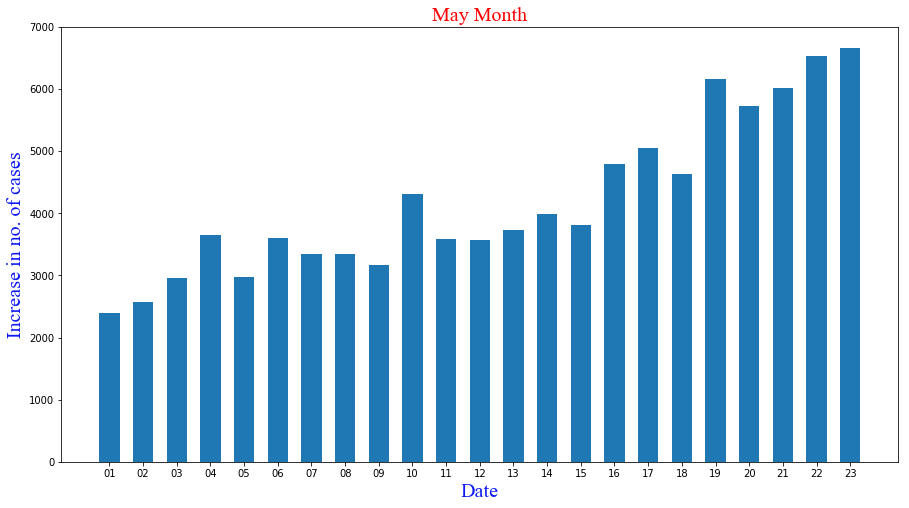

In [13]:
plt.title('May Month',fontsize=20,fontname='Times New Roman',color='r',weight='bold')
plt.xlabel('Date',fontsize=20,fontname='Times New Roman',color='#0d1af3',weight='bold')
plt.ylabel('Increase in no. of cases',fontsize=20,fontname='Times New Roman',color='#0d1af3',weight='bold')

d1=d[(d['month']=="05")]
s=d1.groupby('day').numcases.sum()
plt.bar(s.index,list(s),width=0.6)
plt.show()

### Increase in cases in Punjab for the month of April

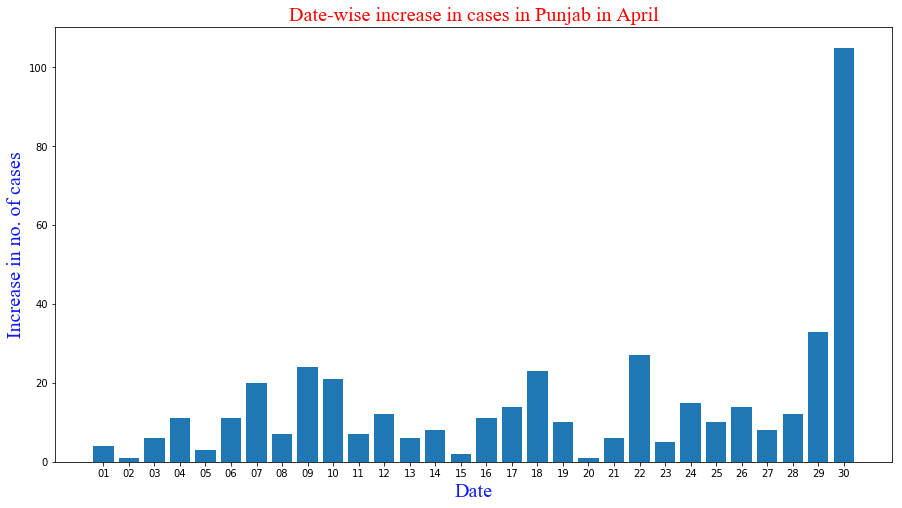

In [14]:
plt.title('Date-wise increase in cases in Punjab in April',fontsize=20,fontname='Times New Roman',color='r',weight='bold')
plt.xlabel('Date',fontsize=20,fontname='Times New Roman',color='#0d1af3',weight='bold')
plt.ylabel('Increase in no. of cases',fontsize=20,fontname='Times New Roman',color='#0d1af3',weight='bold')

d1=d[(d['detectedstate']=="Punjab") & (d['month']=="04")]
s=d1.groupby('day').numcases.sum()
plt.bar(s.index,list(s))
plt.show()

### Increase in cases in Punjab for the month of May

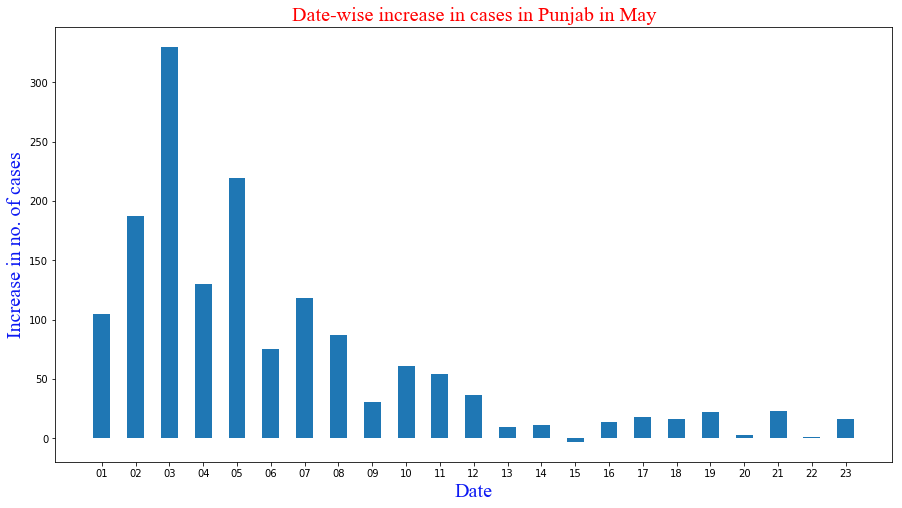

In [15]:
plt.title('Date-wise increase in cases in Punjab in May',fontsize=20,fontname='Times New Roman',color='r',weight='bold')
plt.xlabel('Date',fontsize=20,fontname='Times New Roman',color='#0d1af3',weight='bold')
plt.ylabel('Increase in no. of cases',fontsize=20,fontname='Times New Roman',color='#0d1af3',weight='bold')

d1=d[(d['detectedstate']=="Punjab") & (d['month']=="05")]
s=d1.groupby('day').numcases.sum()
plt.bar(s.index,list(s),width=.5)
plt.show()

In [16]:
d['month']=pd.to_numeric(d['month'])
d['day']=pd.to_numeric(d['day'])
d

c:\users\nitj\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\nitj\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,agebracket,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,gender,nationality,numcases,statecode,statepatientnumber,statuschangedate,typeoftransmission,day,month,year
18,55,P6,Hospitalized,04/03/2020,Gurugram,Italians,Haryana,,Italy,1,HR,,04/03/2020,Imported,4,3,2020
19,55,P6,Hospitalized,04/03/2020,Gurugram,Italians,Haryana,,Italy,1,HR,,04/03/2020,Imported,4,3,2020
21,,P4,Hospitalized,04/03/2020,Agra,Agra,Uttar Pradesh,M,India,1,UP,,04/03/2020,Local,4,3,2020
26,,P4,Hospitalized,04/03/2020,Agra,Agra,Uttar Pradesh,,India,1,UP,,04/03/2020,Local,4,3,2020
27,,P6,Hospitalized,04/03/2020,,Agra,Uttar Pradesh,,India,1,UP,,04/03/2020,Local,4,3,2020
28,27,,Hospitalized,05/03/2020,Janakpuri,South West Delhi,Delhi,M,India,1,DL,DL-P2,05/03/2020,Imported,5,3,2020
31,65,,Hospitalized,07/03/2020,Ladakh,Leh,Ladakh,M,India,1,LA,,07/03/2020,Imported,7,3,2020
32,75,,Hospitalized,07/03/2020,Ladakh,Leh,Ladakh,M,India,1,LA,,07/03/2020,TBD,7,3,2020
39,25,P29,Hospitalized,09/03/2020,Tri Nagar,North Delhi,Delhi,F,India,1,DL,DL-P4,09/03/2020,Local,9,3,2020
40,63,,Hospitalized,09/03/2020,Jammu,Jammu,Jammu and Kashmir,F,India,1,JK,,09/03/2020,Imported,9,3,2020


### User input Function

Enter the state: Maharashtra
Enter the month in integer: 5


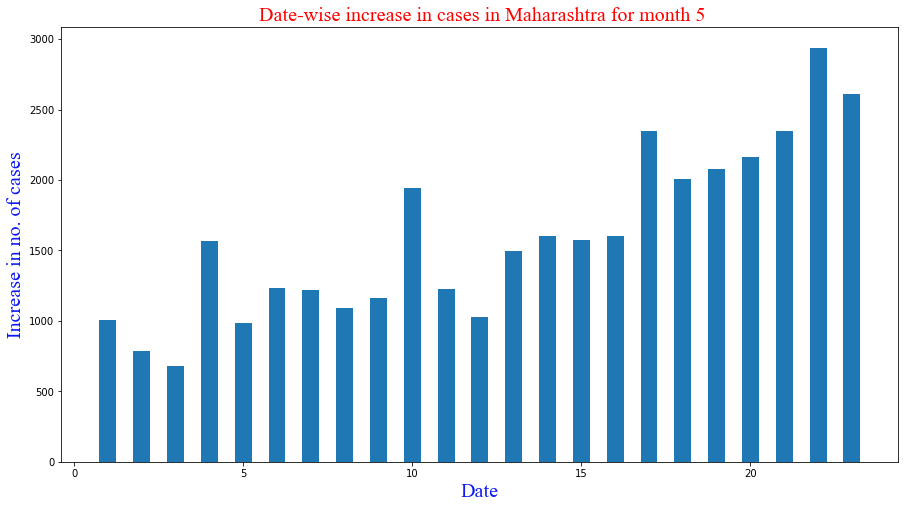

In [17]:
state=input("Enter the state: ")
mon=int(input("Enter the month in integer: "))

plt.title(f" Date-wise increase in cases in {state} for month {mon}",fontsize=20,fontname='Times New Roman',color='r',weight='bold')
plt.xlabel('Date',fontsize=20,fontname='Times New Roman',color='#0d1af3',weight='bold')
plt.ylabel('Increase in no. of cases',fontsize=20,fontname='Times New Roman',color='#0d1af3',weight='bold')

d1=d[(d['detectedstate']==state) & (d['month']==mon)]
s=d1.groupby('day').numcases.sum()
plt.bar(s.index,list(s),width=.5)
plt.show()